In [164]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('steam_spy_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            10000 non-null  int64  
 1   name             10000 non-null  object 
 2   developer        9967 non-null   object 
 3   publisher        9947 non-null   object 
 4   score_rank       5 non-null      float64
 5   positive         10000 non-null  int64  
 6   negative         10000 non-null  int64  
 7   userscore        10000 non-null  int64  
 8   owners           10000 non-null  object 
 9   average_forever  10000 non-null  int64  
 10  average_2weeks   10000 non-null  int64  
 11  median_forever   10000 non-null  int64  
 12  median_2weeks    10000 non-null  int64  
 13  price            10000 non-null  int64  
 14  initialprice     10000 non-null  int64  
 15  discount         10000 non-null  int64  
 16  ccu              10000 non-null  int64  
dtypes: float64(1)

In [8]:
df['score_rank'] = np.nan_to_num(df['score_rank'], nan=0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            10000 non-null  int64  
 1   name             10000 non-null  object 
 2   developer        9967 non-null   object 
 3   publisher        9947 non-null   object 
 4   score_rank       10000 non-null  float64
 5   positive         10000 non-null  int64  
 6   negative         10000 non-null  int64  
 7   userscore        10000 non-null  int64  
 8   owners           10000 non-null  object 
 9   average_forever  10000 non-null  int64  
 10  average_2weeks   10000 non-null  int64  
 11  median_forever   10000 non-null  int64  
 12  median_2weeks    10000 non-null  int64  
 13  price            10000 non-null  int64  
 14  initialprice     10000 non-null  int64  
 15  discount         10000 non-null  int64  
 16  ccu              10000 non-null  int64  
dtypes: float64(1)

In [10]:
df.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
0,730,Counter-Strike: Global Offensive,Valve,Valve,0.0,7642084,1173003,0,"100,000,000 .. 200,000,000",34112,731,6777,297,0,0,0,1013936
1,1172470,Apex Legends,Respawn,Electronic Arts,0.0,668053,326926,0,"100,000,000 .. 200,000,000",11025,635,977,256,0,0,0,124262
2,578080,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",0.0,1520457,1037487,0,"100,000,000 .. 200,000,000",23333,820,5899,335,0,0,0,314682
3,1623730,Palworld,Pocketpair,Pocketpair,0.0,358266,22443,0,"50,000,000 .. 100,000,000",3930,770,2223,397,2249,2999,25,18028
4,440,Team Fortress 2,Valve,Valve,0.0,1044264,117208,0,"50,000,000 .. 100,000,000",21058,772,4175,161,0,0,0,43819


### Top 5 mas jugados historicamente 

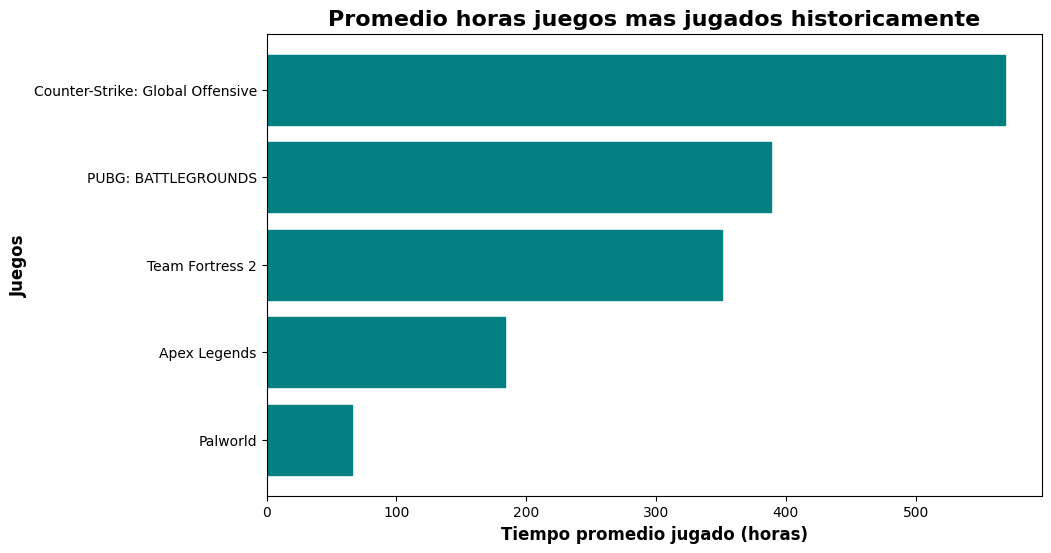

In [120]:
df_top5_jugados = df.head().sort_values(by='average_forever')

plt.figure(figsize=(10,6))

plt.barh(df_top5_jugados['name'], df_top5_jugados['average_forever']/60, color='teal', edgecolor='teal')
plt.title('Promedio horas juegos mas jugados historicamente', fontsize=16, fontweight='bold')
plt.xlabel('Tiempo promedio jugado (horas)', fontsize=12, fontweight='bold')
plt.ylabel('Juegos',  fontsize=12, fontweight='bold')
plt.show()

### Top 5 menos jugados historicamente

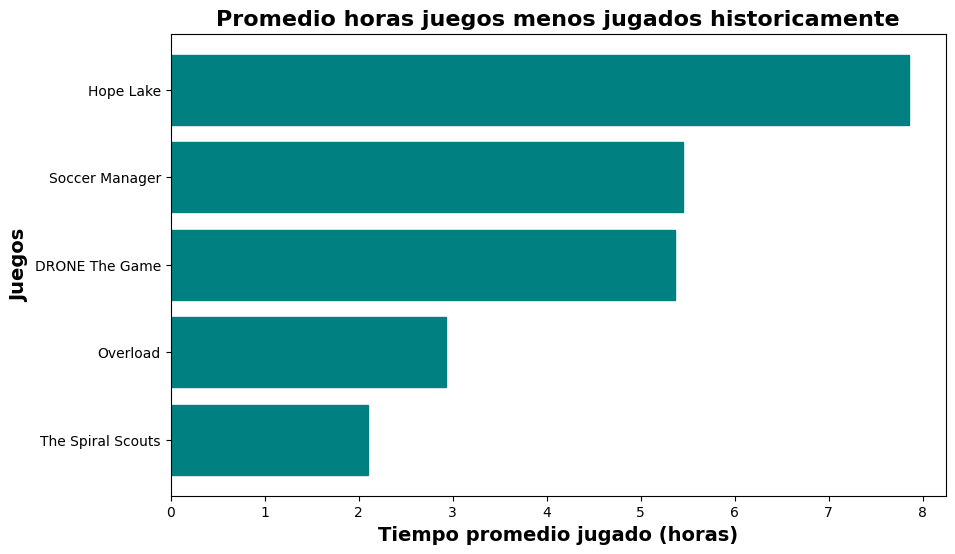

In [ ]:
df_top5_menos_jugados = df.tail().sort_values(by='average_forever')

plt.figure(figsize=(10,6))

plt.barh(df_top5_menos_jugados['name'], df_top5_menos_jugados['average_forever']/60, color='teal', edgecolor='teal')
plt.title('Promedio horas juegos menos jugados historicamente', fontsize=16, fontweight='bold')
plt.xlabel('Tiempo promedio jugado (horas)', fontsize=14, fontweight='bold')
plt.ylabel('Juegos',  fontsize=14, fontweight='bold')
plt.show()

### Reseñas positivas

In [71]:
df['total_reviews'] = df['negative'] + df['positive']

In [72]:
df['percent_positive'] = df['positive'] / df['total_reviews'] * 100
df['percent_negative'] = df['negative'] / df['total_reviews'] * 100

In [114]:
df_positive = df.head().sort_values(by='percent_positive', ascending=False)['name']


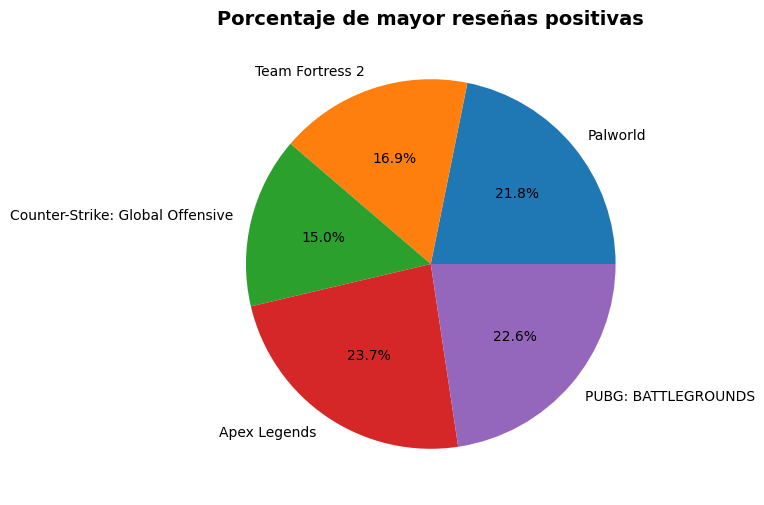

In [118]:
plt.figure(figsize=(8,6))

plt.pie(df['percent_positive'].head(), labels=df_positive, autopct='%1.1f%%')
plt.title('Porcentaje de mayor reseñas positivas', fontweight='bold', fontsize=14)
plt.show()

### Reseñas negativas

In [110]:
df_negative = df.head().sort_values(by='percent_negative', ascending=False)['name']

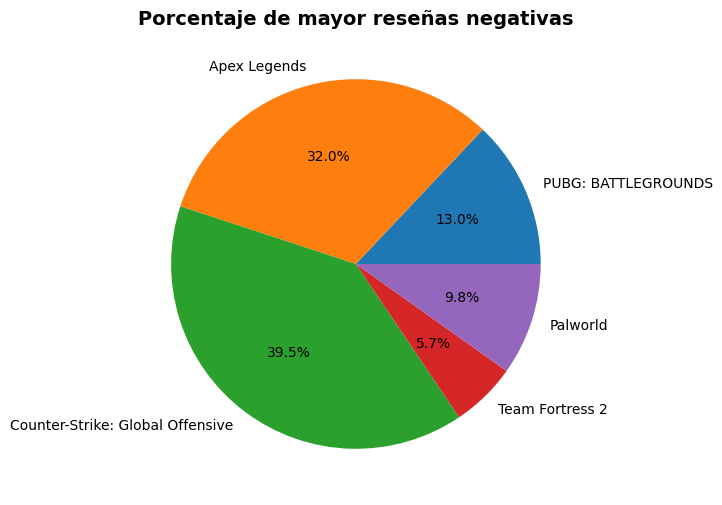

In [146]:
plt.figure(figsize=(8,6))

plt.pie(df['percent_negative'].head(), labels=df_negative, autopct='%1.1f%%')
plt.title('Porcentaje de mayor reseñas negativas', fontweight='bold', fontsize=14)
plt.show()

### Precios

array([[<Axes: title={'center': 'price_dolar'}>]], dtype=object)

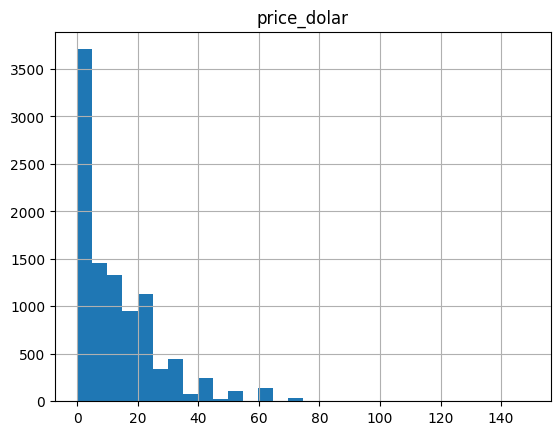

In [145]:
df.hist(column='price_dolar',bins=30)

### Top 5 con precios mas elevados

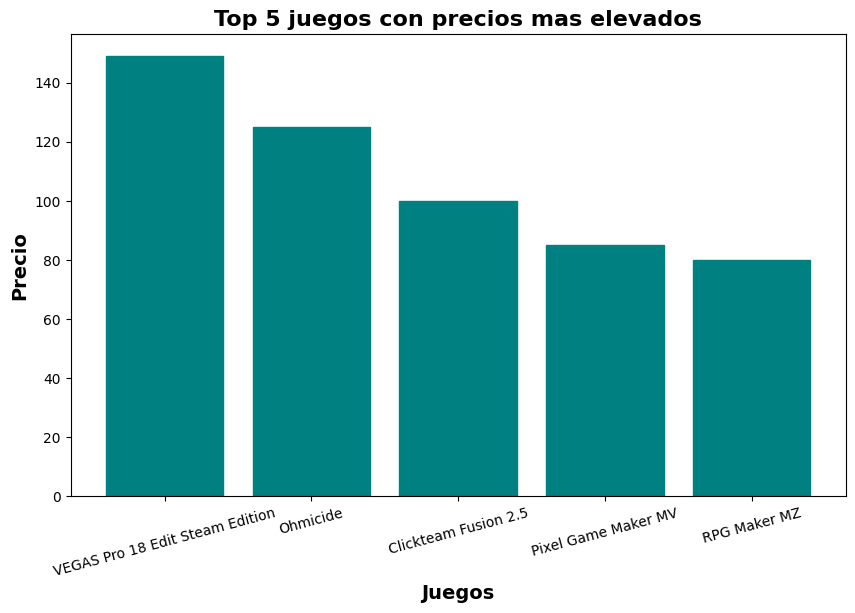

In [187]:
df_top5_caros = df.sort_values(by='price_dolar', ascending=False)[['name', 'price_dolar']].head()

plt.figure(figsize=(10,6))

plt.bar(df_top5_caros['name'], df_top5_caros['price_dolar'], color='teal', edgecolor='teal')
plt.title('Top 5 juegos con precios mas elevados', fontsize=16, fontweight='bold')
plt.xlabel('Juegos', fontsize=14, fontweight='bold')
plt.xticks(rotation=15)
plt.ylabel('Precio',  fontsize=14, fontweight='bold')
plt.show()

### Relacion precio y reseñas negativas

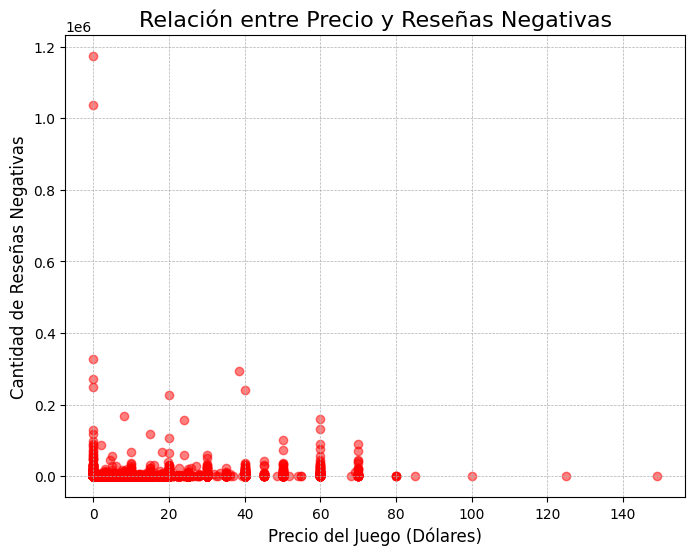

In [154]:
plt.figure(figsize=(8, 6))
plt.scatter(df['price_dolar'], df['negative'], alpha=0.5, color='red') 

plt.title('Relación entre Precio y Reseñas Negativas', fontsize=16)
plt.xlabel('Precio del Juego (Dólares)', fontsize=12)
plt.ylabel('Cantidad de Reseñas Negativas', fontsize=12)
plt.grid(linewidth=0.5, linestyle='--') 

plt.show()

##### ¿Los juegos con precio más elevados tienden a tener más o menos reseñas negativas?

Con este grafico nos damos cuenta que no existe una relacion de juegos con precios elevados y reseñas negativas

### Editores y desarrolladores

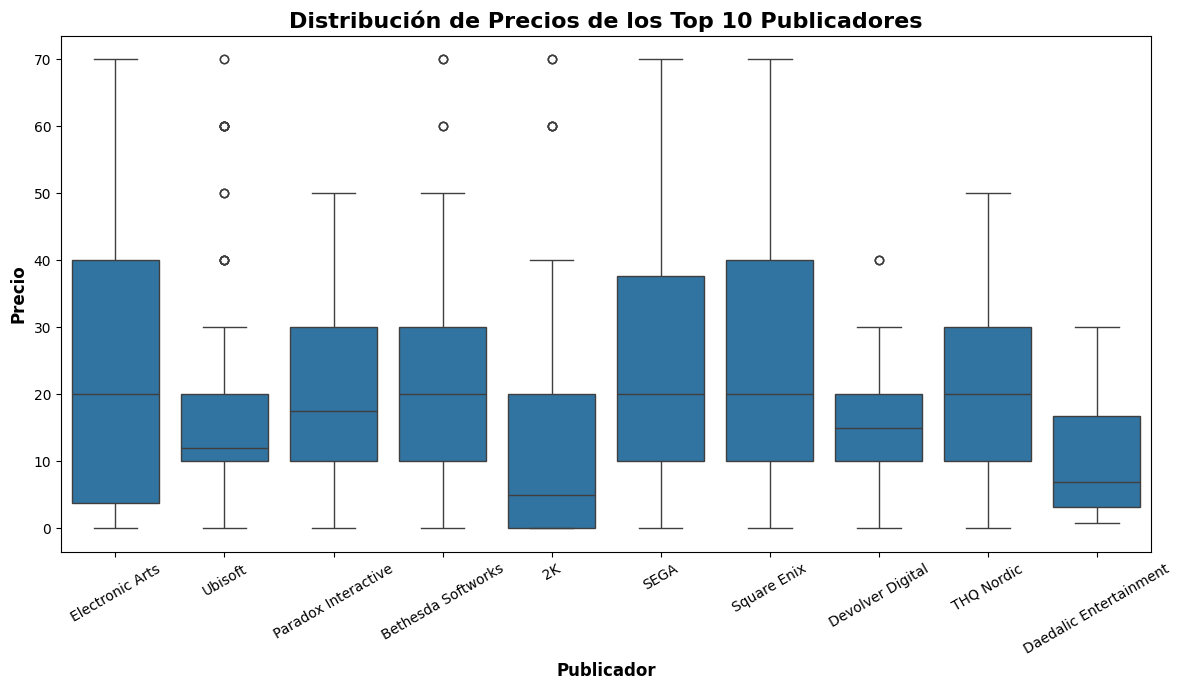

In [182]:
top_10_publicadores = df['publisher'].value_counts().head(10).index
df_top_10_publicadores = df[df['publisher'].isin(top_10_publicadores)]

plt.figure(figsize=(12, 7)) 

sns.boxplot(x='publisher', y='price_dolar', data=df_top_10_publicadores)
plt.xticks(rotation=90) 

plt.title('Distribución de Precios de los Top 10 Publicadores', fontsize=16, fontweight='bold')
plt.xlabel('Publicador', fontsize=12, fontweight='semibold')
plt.ylabel('Precio', fontsize=12, fontweight='semibold')
plt.xticks(rotation=30)
plt.tight_layout() 
plt.show()

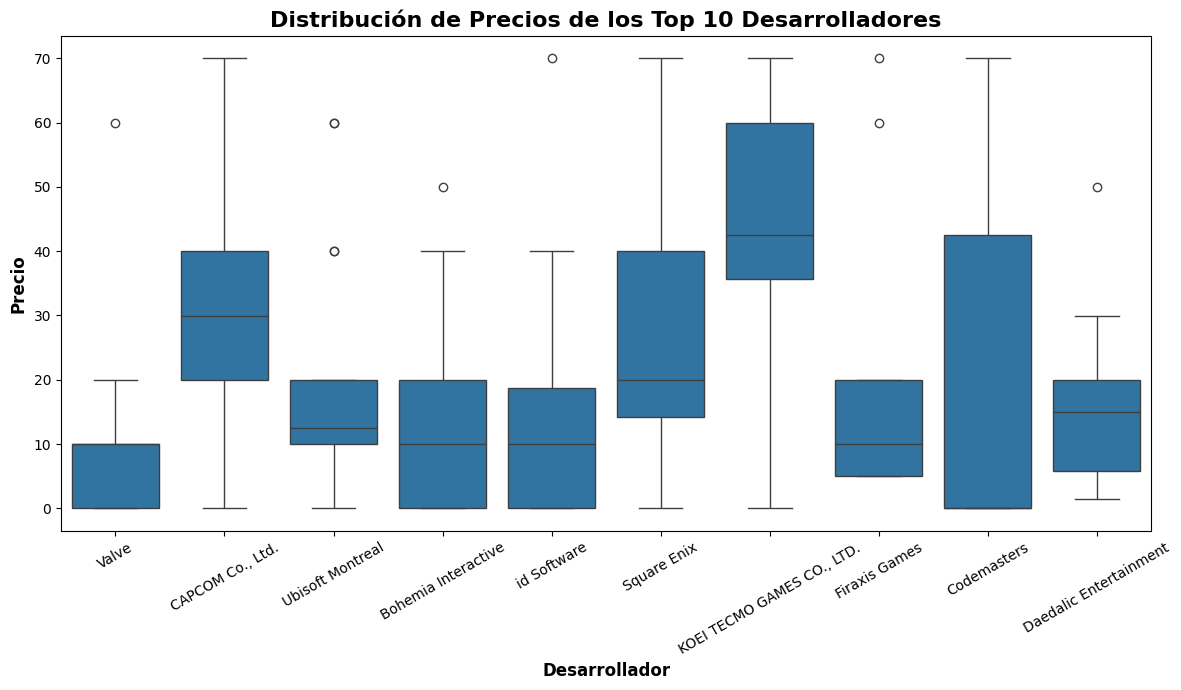

In [184]:
top_10_desarrolladores = df['developer'].value_counts().head(10).index
df_top_10_desarrolladores = df[df['developer'].isin(top_10_desarrolladores)]

plt.figure(figsize=(12, 7)) 

sns.boxplot(x='developer', y='price_dolar', data=df_top_10_desarrolladores)
plt.xticks(rotation=90) 

plt.title('Distribución de Precios de los Top 10 Desarrolladores', fontsize=16, fontweight='bold')
plt.xlabel('Desarrollador', fontsize=12, fontweight='semibold')
plt.ylabel('Precio', fontsize=12, fontweight='semibold')
plt.xticks(rotation=30)
plt.tight_layout() 
plt.show()